In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
from datetime import datetime

# Import the dataset
cipla_data = pd.read_csv("CIPLA.csv")

# Display the first few rows of the dataset
print(cipla_data.head())

         Date Symbol Series  Prev Close    Open     High      Low     Last  \
0  2000-01-03  CIPLA     EQ     1349.40  1410.0  1457.35  1380.05  1457.35   
1  2000-01-04  CIPLA     EQ     1457.35  1537.0  1537.00  1430.00  1466.05   
2  2000-01-05  CIPLA     EQ     1465.25  1474.0  1474.00  1365.00  1441.00   
3  2000-01-06  CIPLA     EQ     1435.05  1434.0  1435.00  1349.00  1365.00   
4  2000-01-07  CIPLA     EQ     1355.85  1370.0  1389.90  1247.40  1247.40   

     Close     VWAP  Volume      Turnover  Trades  Deliverable Volume  \
0  1457.35  1441.36   21060  3.035496e+12     NaN                 NaN   
1  1465.25  1460.43   30215  4.412698e+12     NaN                 NaN   
2  1435.05  1428.11   33799  4.826872e+12     NaN                 NaN   
3  1355.85  1390.55   33083  4.600356e+12     NaN                 NaN   
4  1247.55  1267.49   66536  8.433351e+12     NaN                 NaN   

   %Deliverble  
0          NaN  
1          NaN  
2          NaN  
3          NaN  
4      

In [2]:
cipla_data['Date'] = pd.to_datetime(cipla_data['Date'])
cipla_data.set_index('Date', inplace=True)

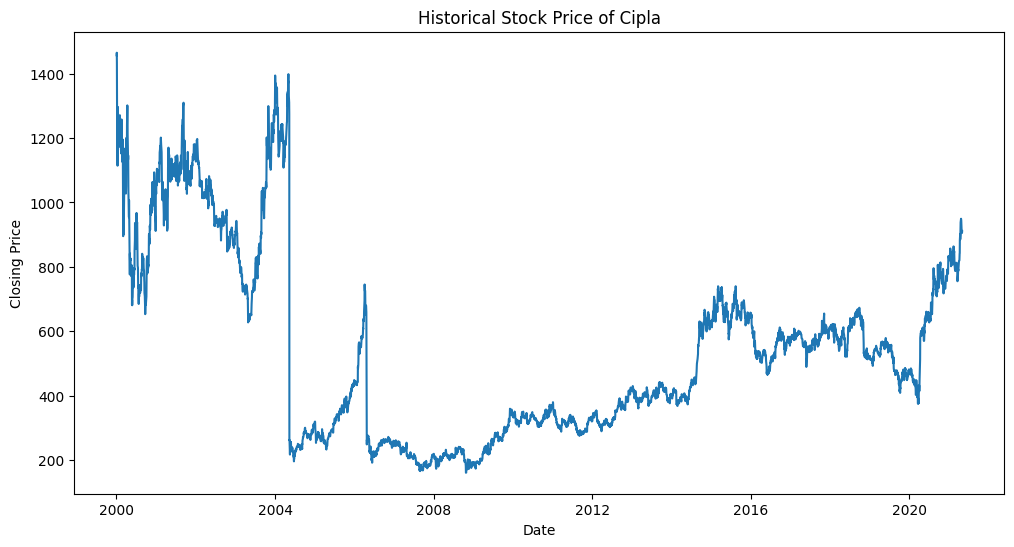

In [3]:
plt.figure(figsize=(12, 6))
plt.plot(cipla_data['Close'])
plt.title('Historical Stock Price of Cipla')
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.show()

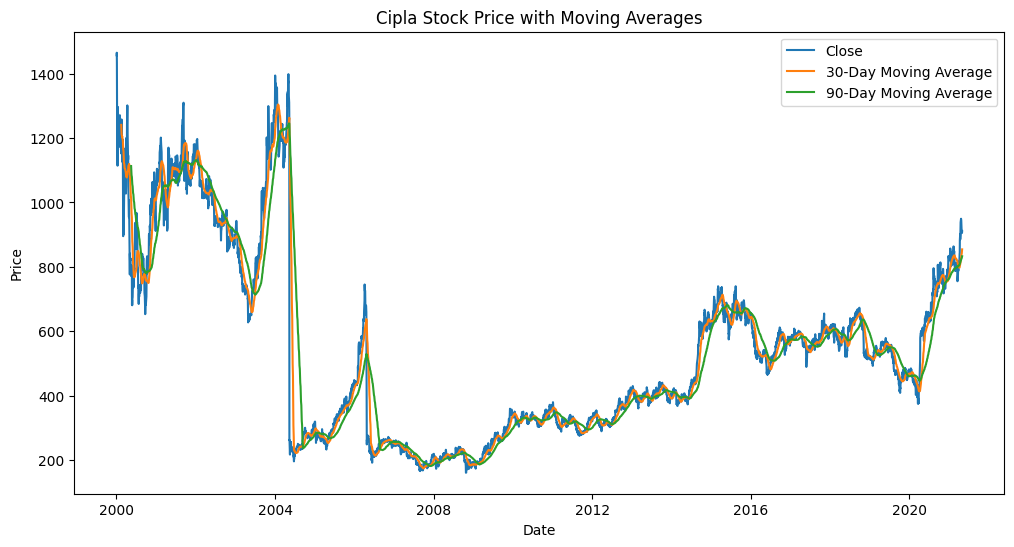

In [4]:
cipla_data['MA30'] = cipla_data['Close'].rolling(window=30).mean()
cipla_data['MA90'] = cipla_data['Close'].rolling(window=90).mean()

plt.figure(figsize=(12, 6))
plt.plot(cipla_data['Close'], label='Close')
plt.plot(cipla_data['MA30'], label='30-Day Moving Average')
plt.plot(cipla_data['MA90'], label='90-Day Moving Average')
plt.title('Cipla Stock Price with Moving Averages')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()

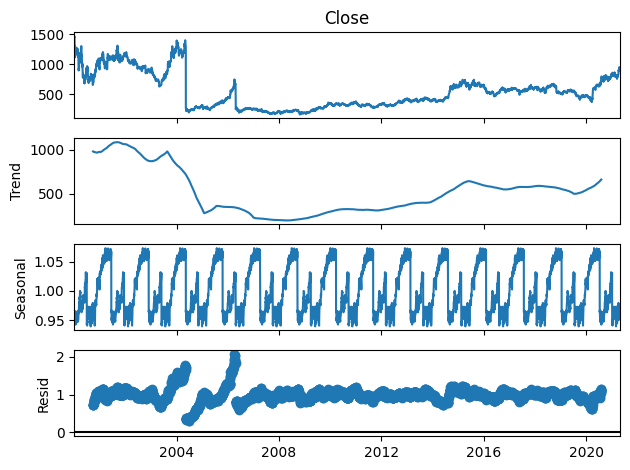

In [5]:
decomposition = sm.tsa.seasonal_decompose(cipla_data['Close'], model='multiplicative', period=365)
fig = decomposition.plot()
plt.show()

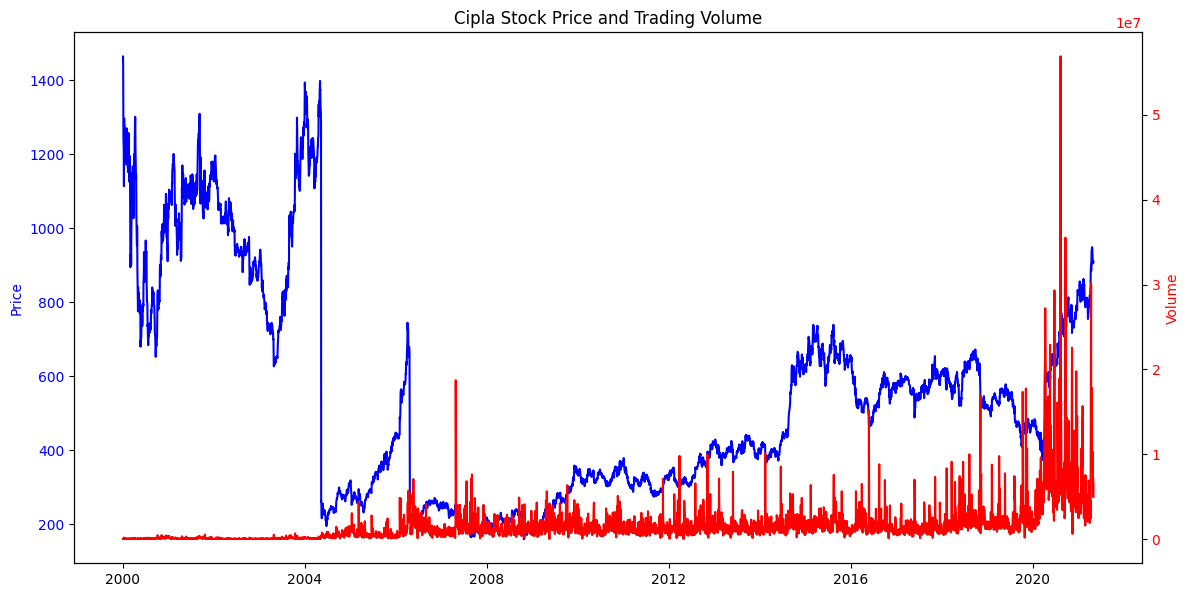

Correlation between closing price and volume: -0.08134659344810648


In [6]:
fig, ax1 = plt.subplots(figsize=(12, 6))

ax1.plot(cipla_data['Close'], color='blue', label='Close')
ax1.set_ylabel('Price', color='blue')
ax1.tick_params(axis='y', labelcolor='blue')

ax2 = ax1.twinx()
ax2.plot(cipla_data['Volume'], color='red', label='Volume')
ax2.set_ylabel('Volume', color='red')
ax2.tick_params(axis='y', labelcolor='red')

fig.tight_layout()
plt.title('Cipla Stock Price and Trading Volume')
plt.show()

correlation = cipla_data['Close'].corr(cipla_data['Volume'])
print(f'Correlation between closing price and volume: {correlation}')


In [13]:
import statsmodels.api as sm
import pmdarima as pm

model = pm.auto_arima(cipla_data['Close'], seasonal=False, stepwise=True, trace=True)
print(model.summary())

# Fit the ARIMA model
model = sm.tsa.ARIMA(cipla_data['Close'], order=model.order)
results = model.fit()

# Forecast future prices for the next 10 years (3650 days)
forecast = results.forecast(steps=3650)
forecast_dates = pd.date_range(start=cipla_data.index[-1], periods=3650, freq='D')

# Plot historical data and forecast
plt.figure(figsize=(12, 6))
plt.plot(cipla_data['Close'], label='Historical')
plt.plot(forecast_dates, forecast, label='Forecast')
plt.title('Cipla Stock Price Forecast for the Next 10 Years')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()


KeyError: 'Close'